In [87]:
import pandas as pd
import json

df = pd.read_csv('./mrc/raw.csv')
print(len(df))
df = df[df['Type'] == 11]
print(len(df))
df['label'] = df['Answer'].apply(lambda x: ['A', 'B', 'C', 'D'].index(x))  # 将标签从ABCD转成0123

def get_choice(line, index):
    choices = eval(line)
    if index >= len(choices):
        return '不知道'
    return choices[index][2:].strip()
    

for i in range(4):
    df[f'choice{i}'] = df['Choices'].apply(lambda x: get_choice(x, i))
    
del df['Choices'], df['Answer'], df['Type']

15425
4342


In [93]:
df.sample(10)

,Unnamed: 0,Question,Q_id,Content,label,choice0,choice1,choice2,choice3
5989,5989,下列对此段内容分析和概括不正确的一项是,266903,于是论次其文。七年而太史公遭李陵之祸，幽於缧绁。乃喟然而叹曰：“是余之罪也夫！是余之罪也夫！...,0,司马迁的感叹表明，他对自己在武帝面前为李陵辩护一事深感后悔。,身毁不用”的叹息 表明，司马迁在遭祸前，还有著述以外的志向。,昔圣先贤发愤著述的故事，给了司马迁以巨大的精神动力。,司马迁列举古圣先贤的事迹，也从一个侧面表明了他想像古圣先贤一样创立不朽业绩。
859,859,下列词的意义和用法相同的一项是,46201,出师表诸葛亮先帝创业未半而中道崩殂，今天下三分，益州疲弊，此诚危急存亡之秋也。然侍卫之臣不懈...,0,之 恢弘志士之气 醉翁之意不在酒,于 欲报之于陛下也 生于忧患死于安乐,以 先帝不以臣卑鄙 属予作文以记之,则 则攸之、祎、允之任也 然则北通巫峡
2220,2220,下列的词语，意思相同的一项是,118701,风烟俱净，天山共色。从流飘荡，任意东西。自富阳至桐庐，一百许里，奇山异水，天下独绝。 ...,3,负 负势竞上 至于负者歌于途,绝 天下独绝 猿则百叫无绝,直 争高直指 直视无碍,俱 风烟俱净 湖中人鸟声俱绝
1230,1230,下列句子中 “以”的用法分类正确的一项是① 皆予之以归 ② 维以卒岁 ③ 师己以实告 ④ 夫...,66301,定公十四年，孔子年五十六，由大司寇行摄相事，有喜色。人曰： “闻君子祸至不惧，福至不喜。 ”...,1,①④ / ②③⑤ / ⑥,①② / ③④⑤ / ⑥,①④ / ②⑤ / ③⑥,①②③ / ④⑤ / ⑥
36,36,下列对文中“初选人调拟先南曹次考功综核无法吏得缘文为奸选者又不得诉长吏将奏罢南曹辟公舍以待来...,2201,许将字冲元，福州闽人。举进士第一。神宗召对，除集贤校理、同知礼院，编修中书条例。初选人调拟先...,3,初/选人调拟/先南曹/次考功/综核无法/吏的缘文为奸选者/又不得诉长吏/将奏罢南曹/辟公舍以...,初选人调拟/先南曹/次考功/综核无法/吏的缘文为奸选者/又不得诉长吏/将奏罢南曹/辟公舍以待...,初选人调拟/先南曹/次考功/综核无法/吏的缘文为奸/选者又不得诉长吏/将奏罢南曹/辟公舍以待...,初/选人调拟/先南曹/次考功/综核无法/吏的缘文为奸/选者又不得诉长吏/将奏罢南曹/辟公舍以...
1273,1273,下列各组句子中字意思完全相同的一项是,68801,曹刿论战十年春，齐师伐我。公将战，曹刿请见。其乡人曰：“肉食者谋之，又何间焉？”刿曰：“肉食...,3,间 又何间焉 ②中间力拉崩倒之声,属 忠之属也 ②属引凄异,请 战则请从 ②俟其欣悦，则又请焉,故 故逐之 ②故天将降大任于是人也
5563,5563,对下列句子中字词解释不正确的一项是,250801,读 （甲）嗟夫！予尝求古仁人之心，或异二者之为。何哉？不以物喜，不以己悲。居庙堂之...,1,予尝求古仁人之心 求：探索,微斯人 微：少,树林阴翳 翳：遮盖,及下船 及：等到。
13534,13534,下列各组句子中，词的意义和用法都相同的一组是,549702,仲尼之齐，见景公而不见晏子。子贡曰：“见君不见其从政者，可乎？”仲尼曰：“吾闻晏子事三君而顺...,3,①见景公而不见晏子②岸土赤而壁立 而,①以一心事三君②皆以杏仁澄之 以,①婴则齐之世民也②是何楚人之多也 之,①因宰予而谢焉②因其固然，技经肯綮之未尝 因
900,900,查阅《古汉语常用子字典》“忽”的释义有如下四项。文中：“祸乱生于所忽．”中“忽”的意思是,48201,创业守成孰难上①问侍臣：“创业与守成②孰③难？”房玄龄曰：“草昧④之初，与群雄并起角力而后臣...,3,古代长度单位，尺的百万分之一,快速,辽阔渺茫的样子,不注意，不重视
11174,11174,（3） 根据原文内容，下列说法不正确的一项是（ ）,459503,《说文解字》：“书，箸也。从聿，者声。”《释名·释书契》：“书，亦言著也，著之简、纸永不灭也...,1,.文字之发明，并不意味着真正意义上的书的诞生。因为文字之发明首先用于记事，若人们尚处于用笔记...,.《诗》、《书》、《礼》的价值意义都是“圣人能及”，在引导人们启迪智慧、提高修养、达到生命的...,.秦汉以前的国学典籍，各具功用，分类别，有层次，有条贯，成体系，且呈动态发展态势。国学学者应...,.书在中国诞生的历程充分说明：书是人类的创造，是文化的载体，是文明的体现，是精神自觉的产物。


In [70]:
train_size = int(len(df) * 0.8)
dev_size = int(len(df) * 0.1)
train_df = df[:train_size]
dev_df = df[train_size:train_size + dev_size]
test_df = df[train_size + dev_size:]


In [71]:
len(train_df), len(dev_df), len(test_df)

(3473, 434, 435)

In [72]:
train_df.to_csv('./mrc/train.csv', index=False)
dev_df.to_csv('./mrc/dev.csv', index=False)
test_df.to_csv('./mrc/test.csv', index=False)

count     435.000000
mean      633.241379
std       472.632089
min        46.000000
25%       302.000000
50%       620.000000
75%       741.500000
max      2657.000000
Name: content_len, dtype: float64


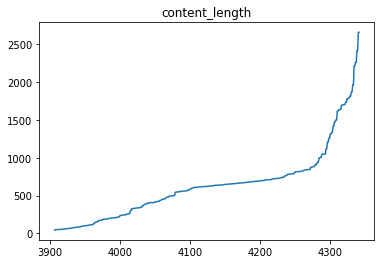

In [74]:
import numpy as np
import matplotlib.pyplot as plt

df['content_len'] = test_df['Content'].apply(len)
print(df.content_len.describe())
plt.title('content_length')
plt.plot(sorted(df.content_len))
plt.show()

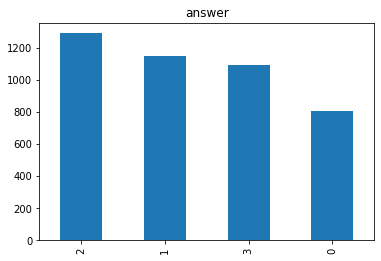

In [63]:
plt.title('answer') #答案个数，C最多
df.label.value_counts().plot.bar()
plt.show()

In [84]:
df.content_len[-100:]

15241    190.0
15246     78.0
15247     78.0
15248    240.0
15249    240.0
         ...  
15413    785.0
15414    785.0
15415    785.0
15416    878.0
15417    878.0
Name: content_len, Length: 100, dtype: float64